In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [33]:
data = pd.read_csv(r'C:\Users\pnish\OneDrive\Documents\Projects\Customer Subscription\appdata10.csv')

In [34]:
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [35]:
data.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
data['hour'] = data.hour.str.slice(1,3).astype(int)

In [37]:
data2 = data.copy()

In [9]:
data2 = data2.drop(columns=['user','first_open','screen_list','enrolled_date','enrolled'])

In [10]:
data2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


## EDA

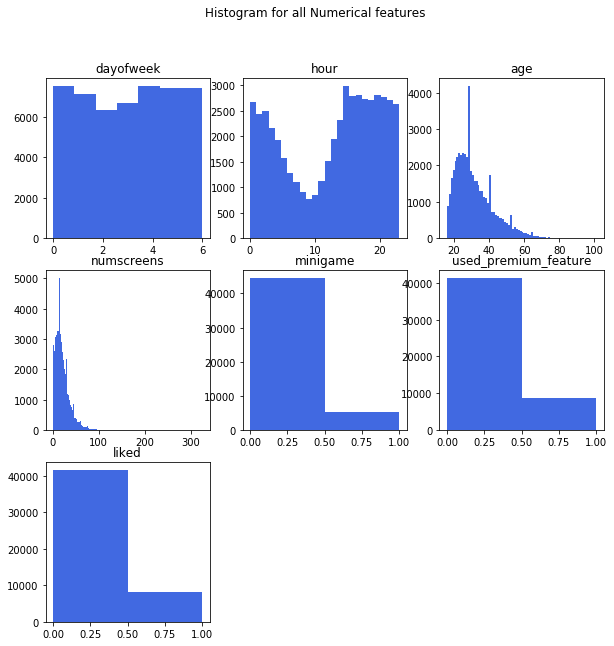

In [11]:
plt.figure(figsize=(10,10))
plt.suptitle('Histogram for all Numerical features')
for i in range(1, data2.shape[1]+1):
    plt.subplot(3,3,i)
    f = plt.gca()
    f.set_title(data2.columns.values[i-1])
    vals = np.size(data2.iloc[:,i-1].unique())
    plt.hist(data2.iloc[:,i-1],bins=vals,color='royalblue')

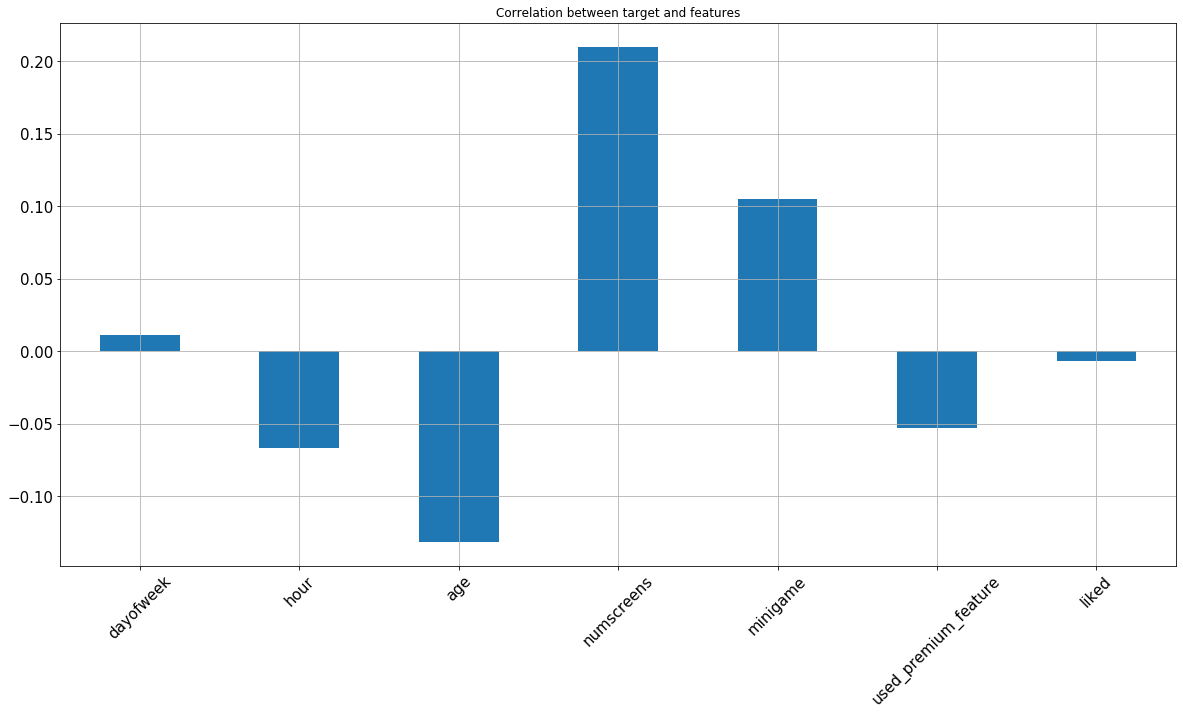

In [12]:
#Correlation plot between features and target
data2.corrwith(data['enrolled']).plot.bar(figsize = (20,10),title='Correlation between target and features',fontsize=15,rot=45,grid=True)

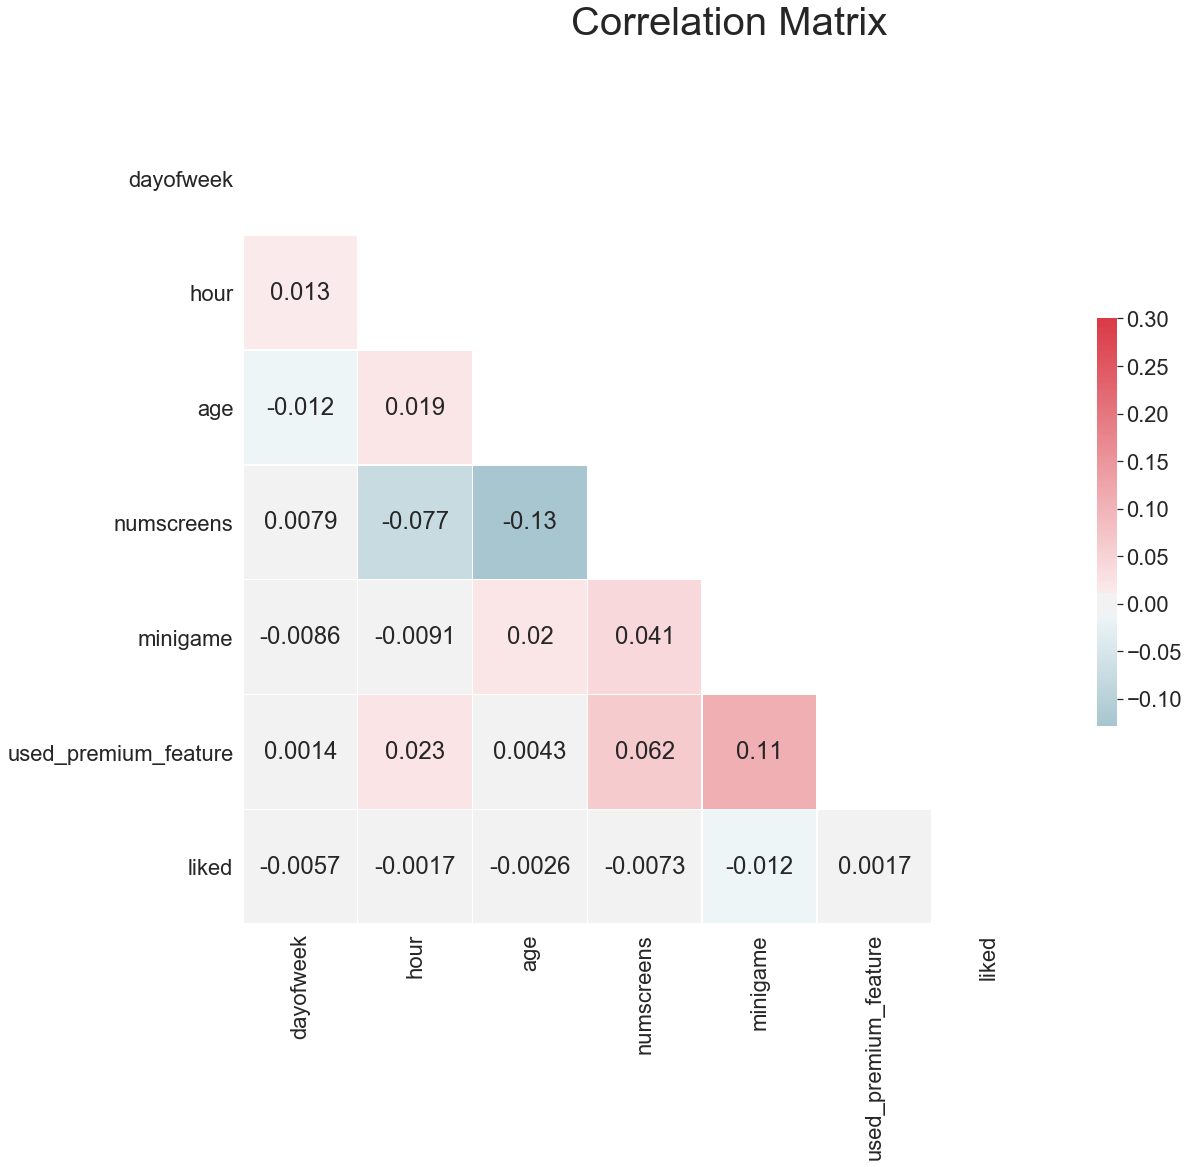

In [13]:
#Correlation Matrix between all features
sns.set(style='white',font_scale=2)
corr = data2.corr()
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f,ax = plt.subplots(figsize=(18,15))
f.suptitle("Correlation Matrix",fontsize = 40)
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask= mask,cmap=cmap, vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={'shrink':.5},annot=True)

## Feature Engineering - Response

In [38]:
data.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

Changing the data types of first_open and enrolled_date columns to Date Type

In [39]:
data['first_open'] = [parser.parse(row) for row in data['first_open']]
data['enrolled_date'] = [parser.parse(row) if isinstance(row,str) else row for row in data['enrolled_date']]

In [40]:
data.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [45]:
data['difference'] = (data.enrolled_date-data.first_open).astype('timedelta64[h]')

Text(0.5, 1.0, 'Distribution of Hours taken to enroll')

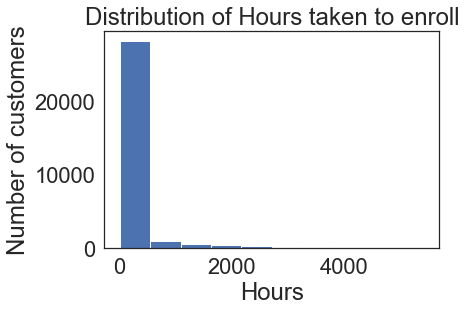

In [51]:
plt.hist(data['difference'].dropna())
plt.xlabel('Hours')
plt.ylabel('Number of customers')
plt.title('Distribution of Hours taken to enroll')

Text(0.5, 1.0, 'Distribution of Hours taken to enroll')

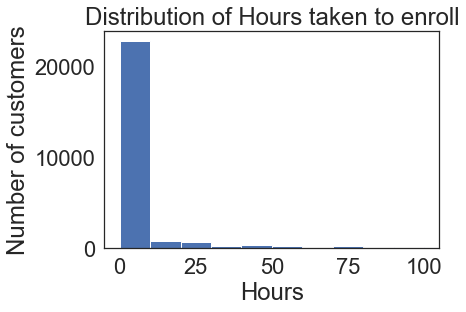

In [55]:
plt.hist(data['difference'].dropna(),range = [0,100])
plt.xlabel('Hours')
plt.ylabel('Number of customers')
plt.title('Distribution of Hours taken to enroll')

### Setting the time lapse for enrolling as 48 hours

In [56]:
data.loc[data.difference>48,'enrolled'] = 0
data = data.drop(columns = ['difference', 'first_open', 'enrolled_date'])

## Feature Engineering - Screens

In [71]:
#Top screens visited by the customers
top_screens = pd.read_csv(r'C:\Users\pnish\OneDrive\Documents\Projects\Customer Subscription\top_screens.csv')
top_screens.head()

,Unnamed: 0,top_screens
0,0,Loan2
1,1,location
2,2,Institutions
3,3,Credit3Container
4,4,VerifyPhone


In [73]:
top_screens = top_screens.top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [76]:
#Creating a separate column for all the top screens
for sc in top_screens:
    data[sc] = data.screen_list.str.contains(sc).astype(int)
    data['screen_list'] = data.screen_list.str.replace(sc+',','')

In [77]:
data

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,Loan,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,"Home,ScanPreview,VerifySSN,product_review,prod...",13,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
49996,169179,1,0,35,"Home,RewardsContainer",4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,302367,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,324905,6,12,27,"Home,product_review,product_review,product_rev...",26,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
#Counting and putting the screens visited by the customers other than top screens under 'Other' column
data['Other'] = data.screen_list.str.count(',')

In [79]:
data = data.drop(columns = ['screen_list'])

In [82]:
#Funnelling the columns
#Done to avoid correlation
credit = ['Credit1','Credit2','Credit3','Credit3Container','Credit3Dashboard']
data['credit_count'] = data[credit].sum(axis=1)
data = data.drop(columns=credit)

In [83]:
cc = ['CC1','CC1Category','CC3']
data['cc_count'] = data[cc].sum(axis=1)
data = data.drop(columns=cc)

In [84]:
loan = ['Loan','Loan2','Loan3','Loan4']
data['loan_count'] = data[loan].sum(axis=1)
data = data.drop(columns=loan)

In [86]:
data.to_csv(r'C:\Users\pnish\OneDrive\Documents\Projects\Customer Subscription\new_data.csv',index=False)